In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("serialkillerdata.csv")
data.head()

,Name,Gender,Birth date,Country,Job,First crime age,Cause,Motive,Victim audience,Proven victims,...,Imprisoned years,Family,Weapon,Alive or dead,By whom,Imprisoned years processed,IQ processed,Consolidated Motive,Consolidated Victim Audience,Generation
0,Luis Garavito,Male,25.01.1957,Colombia,Street vendor,35,Bullying,Desire for power,Children,193,...,22,Eldest,Knife,Dead,Parents,22,Uneducated,Desire for Power or Fame,Children,Baby Boomer Generation
1,Pedro Lopez,Male,08.10.1948,Colombia,Sex worker,22,Sexual abuse,Revenge,Young girls,110,...,25,Middle,Bare hands,Alive,Teacher,25,Uneducated,Revenge or Hatred,Young Individuals,Baby Boomer Generation
2,Javed Iqbal,Male,08.10.1956,Pakistan,Businessman,42,Mental illness,Revenge,Young boys,100,...,700,Middle,Acid,Dead,None/No one,100,Intellectual,Revenge or Hatred,Young Individuals,Baby Boomer Generation
3,Mikhail Popkov,Male,07.03.1964,Russia,Police,34,Resentment/Hate,The desire to cleanse the world of vicious women,Women,86,...,200,Eldest,Metal object,Alive,Prostitutes/Women,100,No info,Cleansing or Societal Change,Miscellaneous Groups,Baby Boomer Generation
4,Daniel Barbosa,Male,22.01.1930,Colombia,Street vendor,44,Bullying,Getting rid of virgins,Young girls,72,...,41,Only child,Knife,Dead,Family members,41,Intellectual,Other Motives,Young Individuals,Silent Generation


In [3]:
data.isnull().sum()

Name                            0
Gender                          0
Birth date                      0
Country                         0
Job                             0
First crime age                 0
Cause                           1
Motive                          1
Victim audience                 0
Proven victims                  0
Total victims                   0
Level of cruelty                0
Crime longitude                 0
Imprisoned years                0
Family                          0
Weapon                          0
Alive or dead                   1
By whom                         0
Imprisoned years processed      0
IQ processed                    0
Consolidated Motive             1
Consolidated Victim Audience    0
Generation                      0
dtype: int64

In [4]:
# Categorizing job titles based on the plan discussed above

def categorize_job(job):
    job = job.strip().lower()
    # Define categories
    manual_laborers = ['laborer', 'labourer', 'farmer', 'builder', 'plumber', 'stone cutter', 'handyman', 'locksmith', 'gardener']
    service_sector = ['street vendor', 'sex worker', 'waiter', 'barber', 'bakery employee', 'domestic servant', 'ice cream vendor', 
                      'child caretaker', 'dancer', 'service']
    transportation = ['truck driver', 'driver', 'ship employee']

    if job in manual_laborers:
        return 'Manual Laborers'
    elif job in service_sector:
        return 'Service Sector'
    elif job in transportation:
        return 'Transportation'
    else:
        return job

# Apply the categorization
data['Job'] = data['Job'].apply(categorize_job)

# Display the updated data to check the categorization
data['Job'].head()


0    Service Sector
1    Service Sector
2       businessman
3            police
4    Service Sector
Name: Job, dtype: object

In [5]:
data['Job'].value_counts()

Job
unemployed              37
no info                 21
Service Sector          15
Manual Laborers         13
medical employee        13
soldier                 13
Transportation           9
police                   7
robber                   4
teacher                  3
businessman              3
male prostitute          3
athlete                  2
housewife                2
agriculture employee     2
blogger                  1
factory worker           1
railway employee         1
firefighter              1
computer operator        1
traveller                1
office worker            1
contractor               1
organist                 1
clown                    1
lawyer                   1
healer                   1
artisan                  1
Name: count, dtype: int64

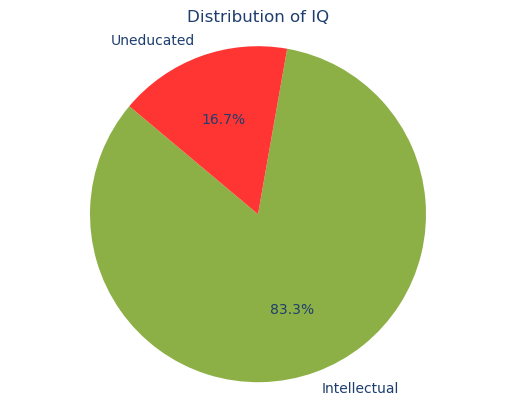

In [27]:
# Cause Distribution
fil_df = data[data['IQ processed'] != 'No info']
cause_counts = fil_df['IQ processed'].value_counts()
colors = ['#8db046', '#fe3533']
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': '#1d3e6e'})
plt.title('Distribution of IQ', color='#1d3e6e')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Text(0.5, 1.0, 'Distribution of Family')

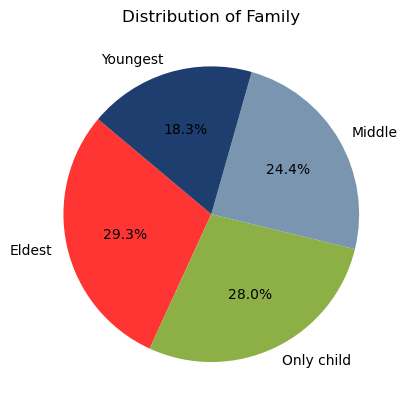

In [28]:
# Cause Distribution
f_df = data[data['Family'] != 'No info']
cause_counts = f_df['Family'].value_counts()
colors=['#fe3533',
'#8db046',
'#7a95b0',
'#1d3e6e']
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Family')

In [ ]:
attention seeker: ESFP, desire for power, control: ENTJ, stubborn and rigid: INFJ, hold grudges: ISTJ

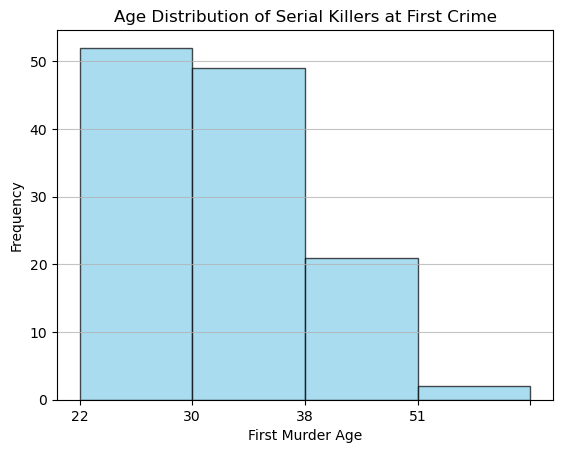

In [42]:
df_sor = data.sort_values('First crime age ')
#plt.figure(figsize=(10, 6))
plt.hist(df_sor['First crime age '], bins=range(10, 50, 8), color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks(range(10, 50, 8))
plt.xlabel('First Murder Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Serial Killers at First Crime')
plt.grid(axis='y', alpha=0.75)
plt.show()

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

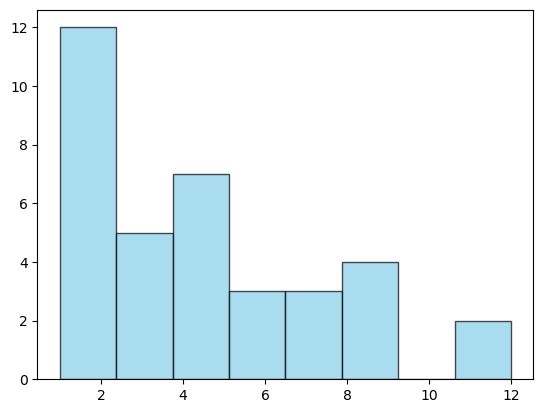

In [52]:
firstage=data['First crime age '].value_counts()
plt.hist(firstage, bins=8, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks(8)
plt.xlabel('First Murder Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Serial Killers at First Crime')
plt.grid(axis='y', alpha=0.75)
plt.show()

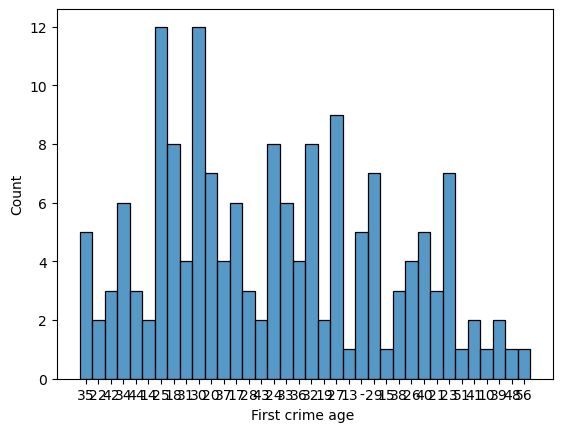

In [55]:
sns.histplot(data['First crime age '], bins=8)
plt.show()

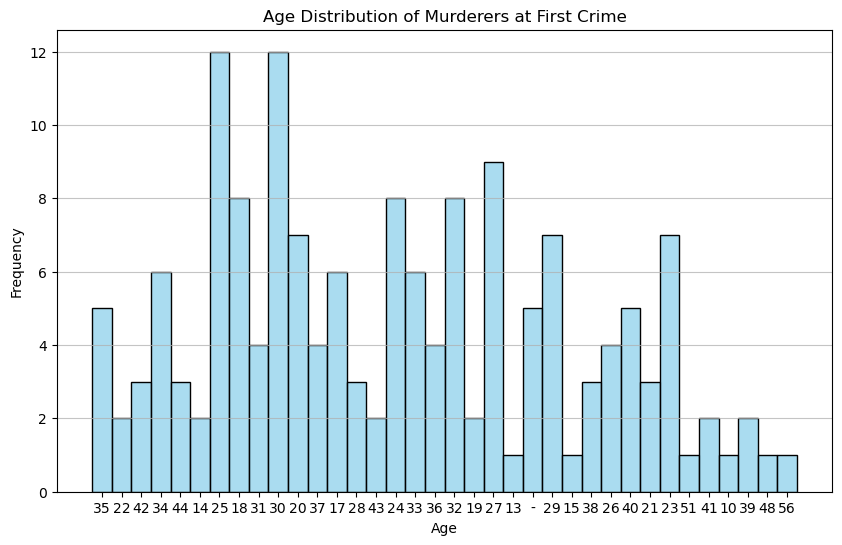

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='First crime age ', bins=range(10, 50, 5), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Murderers at First Crime')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [58]:
data.dtypes

Name                            object
Gender                          object
Birth date                      object
Country                         object
Job                             object
First crime age                 object
Cause                           object
Motive                          object
Victim audience                 object
Proven victims                   int64
Total victims                    int64
Level of cruelty                object
Crime longitude                  int64
Imprisoned years                 int64
Family                          object
Weapon                          object
Alive or dead                   object
By whom                         object
Imprisoned years processed      object
IQ processed                    object
Consolidated Motive             object
Consolidated Victim Audience    object
Generation                      object
dtype: object

In [59]:
data['First crime age '] = pd.to_numeric(data['First crime age '], errors='coerce')


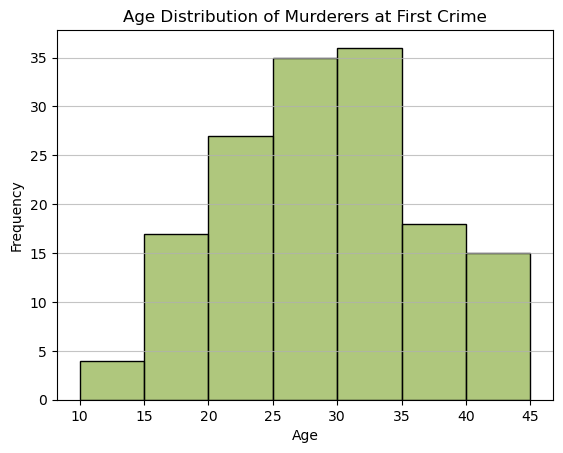

In [62]:

sns.histplot(data=data, x='First crime age ', bins=range(10, 50, 5), color='#8db046', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Murderers at First Crime')
plt.grid(axis='y', alpha=0.75)

plt.show()